In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [15]:
nds = pd.read_csv('Data_set/netflix_titles.csv')
nds

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [20]:
Movie = nds.loc[nds['type'] == 'Movie' , 'release_year']
TV_Show = nds.loc[nds['type'] == 'TV Show' , 'release_year']

In [21]:
np.random.choice(Movie , size = len(Movie))


array([2018, 2014, 2016, ..., 2021, 2019, 2005], shape=(6131,))

In [22]:
np.random.choice(TV_Show , size = len(TV_Show))

array([2019, 2015, 2015, ..., 2020, 2021, 2008], shape=(2676,))

In [23]:
def resample(original_data):
    return np.random.choice(original_data, size=len(original_data))

In [24]:
def bootstrap(orginal_data, reps):
    means = np.array([])

    for i in range(reps):
        new_data = resample(orginal_data)
        new_mean = np.mean(new_data)
        means = np.append(means, new_mean)
    return means

In [25]:
Movie_means = bootstrap(Movie, 1000)
TV_Show_means = bootstrap(TV_Show, 1000)
estimates = Movie_means - TV_Show_means
estimates

array([-3.38516493, -3.34292633, -3.63549986, -3.31022647, -3.57869385,
       -3.5520918 , -3.53072369, -3.39823495, -3.20876819, -3.46017281,
       -3.43604557, -3.66617119, -3.22471785, -3.35243387, -3.41453496,
       -3.58752708, -3.45567046, -3.45148208, -3.33818353, -3.39301027,
       -3.40434062, -3.54182279, -3.24093119, -3.72757055, -3.61303353,
       -3.59079925, -3.50763036, -3.50933487, -3.70417344, -3.27242768,
       -3.51796056, -3.45102531, -3.50685665, -3.41764134, -3.42330523,
       -3.56242687, -3.64988484, -3.70055135, -3.52621519, -3.74770555,
       -3.6729728 , -3.41302215, -3.34073958, -3.2434236 , -3.4353047 ,
       -3.40573116, -3.43560586, -3.3452621 , -3.34006784, -3.69592588,
       -3.56440169, -3.547477  , -3.79086561, -3.51511701, -3.45091011,
       -3.57070216, -3.43150189, -3.43268234, -3.46732044, -3.77682708,
       -3.53043052, -3.45788104, -3.59382054, -3.45328191, -3.33860153,
       -3.1826977 , -3.31534479, -3.35112957, -3.36449716, -3.48

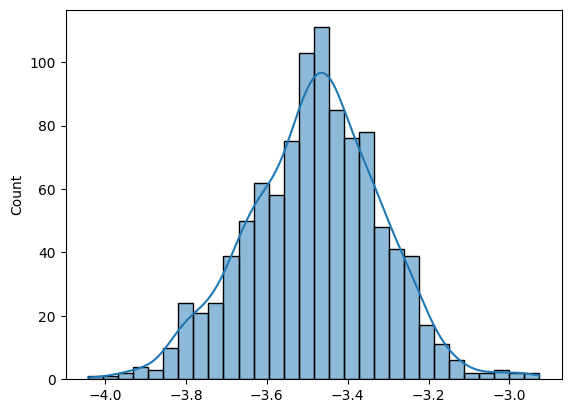

In [30]:
sn.histplot(estimates, bins=30, kde=True)
plt.show()

In [34]:
(np.percentile(estimates, 2.5), np.percentile(estimates, 97.5))

(np.float64(-3.816420728396781), np.float64(-3.180493063260963))

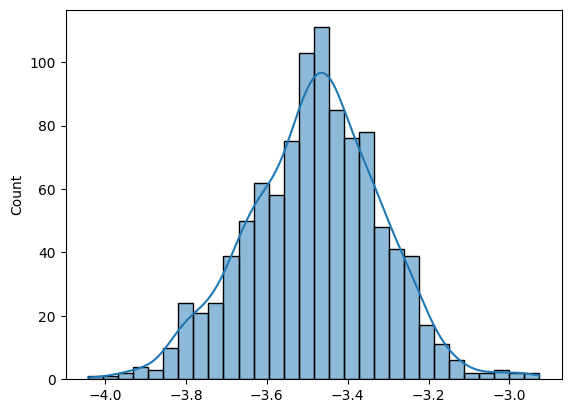

In [35]:
sn.histplot(estimates, bins=30, kde=True)
plt.show()